# Support Class 2

In [1]:
# import packages
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Polya Urn Models

Discrete-time experiment: 
- Initally there are $k$ balls (each unique colour).
- At each time step, draw one ball uniformaly at random and then replace two balls of that colour. 

Transition probability: 

$$p(\underline{x} + e_i | \underline{x}) = \frac{f_i x_i^\gamma}{\sum_{j=1}^{k} f_j x_j^\gamma} $$

In [2]:
# Uniform probability (f_i = 1 and γ = 1)

rng = default_rng()
K = 5 # 5 balls
T = 50 # 50 time steps
XN = np.ones((T, K))  # XN[i, j] is the number of balls with colour j in the i-th experiment

for i in range(1, T):
    selection = rng.choice(K, p=XN[i-1, :]/sum(XN[i-1, :]))
    XN[i, :] = XN[i-1, :]
    XN[i, selection] += 1

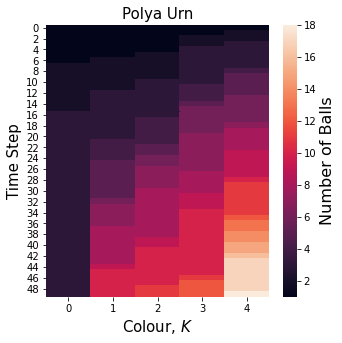

In [3]:
XN.sort(axis=1)
plt.figure(figsize = (5,5))
pcm = sns.heatmap(XN,cbar_kws={'label': r'Number of Balls'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time Step', fontsize = 15)
plt.xlabel(r'Colour, $K$', fontsize = 15)
plt.title('Polya Urn', fontsize = 15);

In [4]:
# fitness probability with reinforcement paramter

rng = default_rng()
K = 500
T = 8000
gamma = 0.5
fitness = np.ones(K)
XN = np.ones((T, K))

for i in range(1,T):
    weighted_probs = fitness * np.power(XN[i-1, :], gamma)
    weighted_probs /= sum(weighted_probs)
    selction = rng.choice(K, p=weighted_probs)
    XN[i, :] = XN[i-1, :]
    XN[i, selction] += 1

We can also code the process into a function:

```Python
def PolyUrn(K, T, gamma, fitness):
    '''
    This function simulates the Polya Urn Model.
    
    Inputs:
        - K: the number of colours (int)
        - T: the number time steps (int)
        - gamma: the reinforcement parameter (float)
        - fitness: the fitness probabilities (np.array(K))

    Output:
        - XN: the simulated process, whose (i,j) element represents the number of balls with colour j in
              the i-th experiment (np.array(T, K))
    '''
    rng = default_rng()
    XN = np.ones((T, K))
    
    for i in range(1, T):
        selection_probs = fitness * np.power(XN[i-1, :], gamma)
        selection_probs /= sum(selection_probs)
        selection = rng.choice(K, p=selection_probs)
        XN[i, :] = XN[i-1, :]
        XN[i, selection] += 1
        
    return XN
```

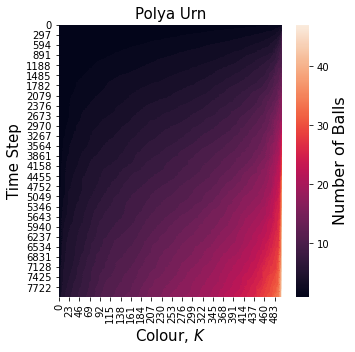

In [5]:
XN.sort(axis=1)
plt.figure(figsize = (5,5))
pcm = sns.heatmap(XN,cbar_kws={'label': r'Number of Balls'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time Step', fontsize = 15)
plt.xlabel(r'Colour, $K$', fontsize = 15)
plt.title('Polya Urn', fontsize = 15);

## 2. Empirical Tail Distributions

[Empirical CDF](https://www.statsmodels.org/devel/generated/statsmodels.distributions.empirical_distribution.ECDF.html)

In [6]:
from statsmodels.distributions.empirical_distribution import ECDF

In [7]:
K = 500
T_small = 5000
T_middle = 20000
T_large = 80000
gamma = 1
fitness = np.ones(K)

In [8]:
def PolyUrn(K, T, gamma, fitness):
    '''
    This function simulates the Polya Urn Model.
    
    Inputs:
        - K: the number of colours (int)
        - T: the number time steps (int)
        - gamma: the reinforcement parameter (float)
        - fitness: the fitness probabilities (np.array(K))

    Output:
        - XN: the simulated process, whose (i,j) element represents the number of balls with colour j in
              the i-th experiment (np.array(T, K))
    '''
    rng = default_rng()
    XN = np.ones((T, K))
    
    for i in range(1, T):
        selection_probs = fitness * np.power(XN[i-1, :], gamma)
        selection_probs /= sum(selection_probs)
        selection = rng.choice(K, p=selection_probs)
        XN[i, :] = XN[i-1, :]
        XN[i, selection] += 1
        
    return XN

In [9]:
XN_small = PolyUrn(K, T_small, gamma, fitness)
XN_middle = PolyUrn(K, T_middle, gamma, fitness)
XN_large = PolyUrn(K, T_large, gamma, fitness)

In [10]:
ecdf_small = ECDF(XN_small[T_small-1, :])
ecdf_middle = ECDF(XN_middle[T_middle-1, :])
ecdf_large = ECDF(XN_large[T_large-1, :])

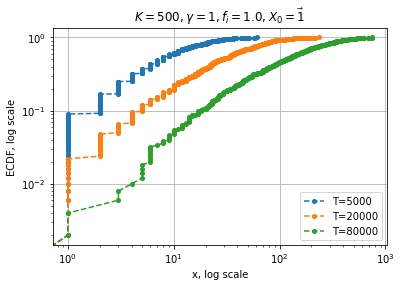

In [11]:
plt.plot(ecdf_small.x, ecdf_small.y, linestyle='--', marker='o', ms=4, label='T=%d'%T_small)
plt.plot(ecdf_middle.x, ecdf_middle.y, linestyle='--', marker='o', ms=4, label='T=%d'%T_middle)
plt.plot(ecdf_large.x, ecdf_large.y, linestyle='--', marker='o', ms=4, label='T=%d'%T_large)

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel("ECDF, log scale")
plt.title(r'$K = {}, \gamma = {}, f_i = {}, X_0 = \vec 1$'.format(K, gamma, fitness[0]))
plt.xlabel('x, log scale')
plt.grid(True)

## 3. Gershgorin Circle /Theorem

Let $A$ be a complex $n \times n$ matrix, with entries $a_{i,j}$. For $i \in \{1,\cdots,n\}$, let $R_i = \sum\limits_{j \neq i} |a_{i,j}|$ be the sum of the absolute values of the non-diagonal entries in the $i$-th row. Let $D(a_{i,i},R_i) \subset \mathbb{C}$ be a closed disc centered at $a_{i,i}$ with radius $R_i$. Such a disc is called a **Gershgorin disc**.

The [Gershgorin Circle Theorem](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem) states that *every eigenvalue of $A$ lies within at least one of the Gershgorin discs $D(a_{i,i}, R_i)$.*

### 3.1 Simple Random Walk with Periodic Boundary Conditions

Consider a random walk, with 4 states and periodic boundary conditions.

In [12]:
p = 0.3
q = 1-p
A = np.array([[0,p,0,0,q], [q,0,p,0,0], [0,q,0,p,0], [0,0,q,0,p], [p,0,0,q,0]])
print(A)

[[0.  0.3 0.  0.  0.7]
 [0.7 0.  0.3 0.  0. ]
 [0.  0.7 0.  0.3 0. ]
 [0.  0.  0.7 0.  0.3]
 [0.3 0.  0.  0.7 0. ]]


In [13]:
n = A.shape[0]
centers = np.zeros((n, 1))
radii = np.zeros((n, 1))

for i in range(n):
    centers[i] = A[i,i]
    radii[i] = sum(np.abs(A[i, :])) - abs(A[i, i])

evals, evecs = np.linalg.eig(A)

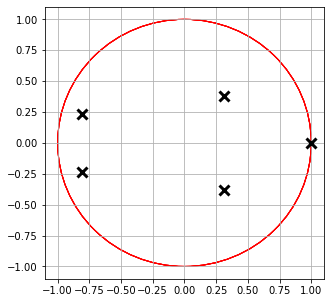

In [14]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()

for i in range(n):
    disc = plt.Circle((centers[i], 0), radius=radii[i], color='r', fill=False)
    ax.add_artist(disc)
    plt.plot(np.real(evals[i]), np.imag(evals[i]), 'kx', mew=3, ms=10) # Plot evalue i
    
lim = 1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()

In [15]:
print("Egenvalues are\n" + str(evals))
print ('Eigenvectors are\n', evecs.T)

Egenvalues are
[-0.80901699+0.2351141j  -0.80901699-0.2351141j   1.        +0.j
  0.30901699+0.38042261j  0.30901699-0.38042261j]
Eigenvectors are
 [[ 0.4472136+0.j         -0.3618034-0.26286556j  0.1381966+0.4253254j
   0.1381966-0.4253254j  -0.3618034+0.26286556j]
 [ 0.4472136-0.j         -0.3618034+0.26286556j  0.1381966-0.4253254j
   0.1381966+0.4253254j  -0.3618034-0.26286556j]
 [-0.4472136+0.j         -0.4472136+0.j         -0.4472136+0.j
  -0.4472136+0.j         -0.4472136+0.j        ]
 [-0.4472136+0.j         -0.1381966+0.4253254j   0.3618034+0.26286556j
   0.3618034-0.26286556j -0.1381966-0.4253254j ]
 [-0.4472136-0.j         -0.1381966-0.4253254j   0.3618034-0.26286556j
   0.3618034+0.26286556j -0.1381966+0.4253254j ]]


### 3.2 Lazy Random Walk

Let $(X_n : n \in \mathbb{N})$ be a discrete-time Markov chain with transition matrix $p(x,y)$. The discrete-time Markov chain with transition matrix

\begin{equation*}
    p^\epsilon(x,y) = \epsilon \delta(x,y) + (1-\epsilon)p(x,y), \qquad \epsilon \in (0,1)
\end{equation*}

is called a **lazy version** of the original chain.

In [16]:
eps = 0.1 # stay
p = 0.3 # move right
q = 1 - p - eps # move left
A = np.array([[eps,p,0,q], [q,eps,p,0], [0,q,eps,p], [p,0,q,eps]])
print(A)

[[0.1 0.3 0.  0.6]
 [0.6 0.1 0.3 0. ]
 [0.  0.6 0.1 0.3]
 [0.3 0.  0.6 0.1]]


In [17]:
n = A.shape[0]
centers = np.zeros((n, 1))
radii = np.zeros((n, 1))

for i in range(n):
    centers[i] = A[i,i]
    radii[i] = sum(np.abs(A[i, :])) - abs(A[i, i])

evals, evecs = np.linalg.eig(A)

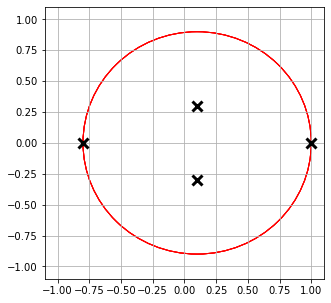

In [18]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()

for i in range(n):
    disc = plt.Circle((centers[i], 0), radius=radii[i], color='r', fill=False)
    ax.add_artist(disc)
    plt.plot(np.real(evals[i]), np.imag(evals[i]), 'kx', mew=3, ms=10) # Plot evalue i
    
lim = 1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()